In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt

dataset = None

In [49]:
# Transform the data
lines = []
with open("history.csv", newline='') as f:
    freader = csv.reader(f)
    for row in freader:
        lines.append(row)
with open("hw5.csv", "w") as file:
    file.write("year,days\n")
    for line in reversed(lines[1:]):
        try:
            days = int(line[3])
        except:
            continue
        year_str = int(line[0].split('-')[0])
        if year_str >= 2022 or year_str < 1855:
            continue
        file.write(str(year_str)+","+str(days))
        if year_str != 2021:
            file.write("\n")

In [32]:
read_data = []
with open("toy.csv", "r") as f:
    lines = f.readlines()
    for line in lines[1:]:
        # 0 is year, 1 is number of days
        read_data.append([int(line.split(",")[0]), int(line.split(",")[1])])

dataset = np.array(read_data, dtype=np.int64)
# print(dataset)

Text(0, 0.5, 'Number of frozen Days')

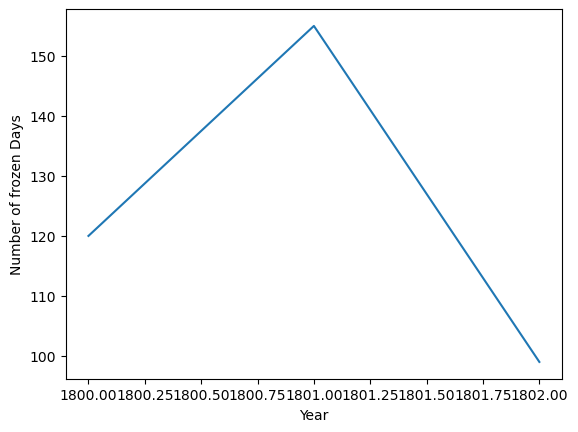

In [33]:
plt.plot(dataset[:, 0], dataset[:, 1])
plt.xlabel("Year")
plt.ylabel("Number of frozen Days")
# plt.savefig("plot.jpg")

In [34]:
temp = np.array(dataset[:, 0]).reshape((len(dataset[:,0]), 1))
intercept = np.ones((len(temp), 1))
print("Q3a:")
# print(temp)
# print(len(intercept))
X = np.array(np.append(intercept, temp, axis=1), dtype=np.int64)
print(X)

Q3a:
[[   1 1800]
 [   1 1801]
 [   1 1802]]


In [35]:
# Question 3B
print("Q3b:")
Y = np.array(dataset[:, 1])
print(Y)

Q3b:
[120 155  99]


In [36]:
print("Q3c:")
Z = X.T @ X
Z = np.array(Z, dtype=np.int64)
print(Z)

Q3c:
[[      3    5403]
 [   5403 9730805]]


In [37]:
print("Q3d:")
I_inv = np.linalg.inv(Z)
print(I_inv)

Q3d:
[[ 1.62180083e+06 -9.00500000e+02]
 [-9.00500000e+02  5.00000000e-01]]


In [38]:
print("Q3e:")
PI = np.dot(I_inv, X.T)
print(PI)

Q3e:
[[ 9.00833333e+02  3.33333334e-01 -9.00166666e+02]
 [-5.00000000e-01  0.00000000e+00  5.00000000e-01]]


In [39]:
print("Q3f:")
beta_hat = np.dot(PI, Y)
print(beta_hat)

Q3f:
[ 1.90351667e+04 -1.05000000e+01]


In [40]:
x_test = np.array((1, 2022))
y_test = np.dot(beta_hat, x_test)
print("Q4: {}".format(y_test))

Q4: -2195.833332218419


In [41]:
if beta_hat[1] > 0:
    print("Q5a: >")
elif beta_hat[1] < 0:
    print("Q5a: <")
else:
    print("Q5a: =")
# Question 5b: Interpretation
print("Q5b: We have only one feature and one prediction, which is years and the"
      " number of frozen days for that year. This is the slope of the line that"
      " plots the number of days vs years (years are strictly increasing order)"
      "So, the sign < indicates that the number of frozen days are (usually) decreasing "
      "every passing year, sign > indicates that the number of frozen days is"
      "(usually) increasing per year. Lastly, sign = indicates that the number of frozen"
      " days (usually) are similar as the previous years (not many changes)")

Q5a: <
Q5b: We have only one feature and one prediction, which is years and the number of frozen days for that year. This is the slope of the line that plots the number of days vs years (years are strictly increasing order)So, the sign < indicates that the number of frozen days are (usually) decreasing every passing year, sign > indicates that the number of frozen days is(usually) increasing per year. Lastly, sign = indicates that the number of frozen days (usually) are similar as the previous years (not many changes)


In [42]:
beta_0 = beta_hat[0]
beta_1 = beta_hat[1]
x_star = (-1 * beta_0) / beta_1
print("Q6a: {}".format(x_star))

print("Q6b: Based on the trends observed in the data, the prediction seems to be a"
      " compelling. The reasoning is as follows: The overall number of days the lake "
      "was frozen, is decreasing overall with increase in years. This is indicated by the "
      "negative weight for the year value in the model as well as "
      "the averages calculated over several intervals in the data, where the count was"
      " 121.73 from 1855 to 1875, and dropped to an average of 83.56 from 1999 to 2022;"
      " also indicate the same trend. Based on these trends, it seems likely that"
      " the prediction is indeed a compelling one. That being said, it cannot be guaranteed"
      " that the predicted value will be the exact value where we will see 0 frozen days."
      " The confidence of the model is not known and can be derived with testing the same on a combination of "
      "training and testing data (split from the given data). The accuracy obtained throught this testing "
      "will give us much more confidence in the predicted value. "
      "The regression produces a best-fitting line for the provided data, however, the trends can always change.")


Q6a: 1812.873015889519
Q6b: Based on the trends observed in the data, the prediction seems to be a compelling. The reasoning is as follows: The overall number of days the lake was frozen, is decreasing overall with increase in years. This is indicated by the negative weight for the year value in the model as well as the averages calculated over several intervals in the data, where the count was 121.73 from 1855 to 1875, and dropped to an average of 83.56 from 1999 to 2022; also indicate the same trend. Based on these trends, it seems likely that the prediction is indeed a compelling one. That being said, it cannot be guaranteed that the predicted value will be the exact value where we will see 0 frozen days. The confidence of the model is not known and can be derived with testing the same on a combination of training and testing data (split from the given data). The accuracy obtained throught this testing will give us much more confidence in the predicted value. The regression produces

In [29]:
# plt.plot(dataset[124:, 0], dataset[124:, 1])
# plt.xlabel("Year")
# plt.ylabel("Number of frozen Days")
# # plt.savefig("plot.jpg")

In [30]:
# print(np.average(dataset[149:, 1]))
# print(np.average(dataset[124:149, 1]))
# print(np.average(dataset[99:124, 1]))
# print(np.average(dataset[74:99, 1]))
# print(np.average(dataset[49:74, 1]))
# print(np.average(dataset[25:49, 1]))
# print(np.average(dataset[0:25, 1]))
# # np.average(dataset[:124, 1])
# # np.average(dataset[:, 1])